In [1]:
# Libraries to be imported
import pandas as pd 

In [2]:
df = pd.read_csv("genz_slang_usage_2020_2025.csv")

## Exploring the data 

In [3]:
df.head()

,record_id,timestamp,slang_term,term_category,term_meaning,origin_platform,usage_platform,region,user_id,user_age_group,...,intensity_score,sentiment,sentiment_score,ironic_usage,likes,shares,comments,virality_score,is_viral,days_since_emergence
0,0,2020-01-01 01:23:17,simp,insult,someone overly devoted to another person,Reddit,Twitter,California,user_019223,25-30,...,0.603,negative,-0.740,False,18,2,5,0.004,False,153
1,1,2020-01-01 03:21:59,simp,insult,someone overly devoted to another person,Reddit,Twitter,Texas,user_497341,13-17,...,0.603,negative,-0.978,False,24,1,2,0.004,False,153
2,2,2020-01-01 05:31:01,vibe check,social,checking someone's mood/energy,TikTok,TikTok,Canada,user_323563,31-40,...,0.552,positive,0.384,False,121,1,0,0.013,False,92
3,3,2020-01-01 05:35:30,no cap,emphasis,"no lie, for real",Twitter,Twitter,Arizona,user_244857,18-24,...,0.551,neutral,0.167,False,47,2,1,0.006,False,214
4,4,2020-01-01 06:39:57,no cap,emphasis,"no lie, for real",Twitter,Instagram,Arizona,user_421848,13-17,...,0.551,positive,0.874,False,18,0,14,0.006,False,214


In [4]:
df.describe()

,record_id,intensity_score,sentiment_score,likes,shares,comments,virality_score,days_since_emergence
count,535396.000000,535396.000000,535396.000000,535396.000000,535396.000000,535396.000000,535396.000000,535396.000000
mean,267697.500000,0.656799,0.175213,61.483362,3.298273,7.009772,0.009765,474.526909
std,154555.656699,0.229561,0.542696,227.016926,16.171007,30.638933,0.022437,269.419917
min,0.000000,0.090000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,133848.750000,0.505000,-0.212000,9.000000,0.000000,1.000000,0.003000,261.000000
50%,267697.500000,0.687000,0.246000,28.000000,1.000000,3.000000,0.006000,446.000000
75%,401546.250000,0.844000,0.633000,71.000000,4.000000,8.000000,0.012000,655.000000
max,535395.000000,1.000000,1.000000,35200.000000,3990.000000,6121.000000,1.000000,1428.000000


In [5]:
print(f"Total record count: {len(df)} \n")
print(f"Total number of  columns in the dataset {len(df.columns)}")
print(f"The columns in list form {list(df.columns)}")

Total record count: 535396 

Total number of  columns in the dataset 22
The columns in list form ['record_id', 'timestamp', 'slang_term', 'term_category', 'term_meaning', 'origin_platform', 'usage_platform', 'region', 'user_id', 'user_age_group', 'usage_context', 'lifecycle_phase', 'intensity_score', 'sentiment', 'sentiment_score', 'ironic_usage', 'likes', 'shares', 'comments', 'virality_score', 'is_viral', 'days_since_emergence']


In [6]:
# Top 15 slang words used 
slang_words = df.groupby('slang_term')['record_id'].count().sort_values(ascending=False).head(15)
slang_words

slang_term
slay              19004
based             18541
bussin            17651
rizz              16782
gaslighting       16766
sigma             15630
ate               15626
delulu            15244
snatched          15201
no cap            15107
mid               14642
rent free         14401
brain rot         14324
main character    14324
NPC               14194
Name: record_id, dtype: int64

In [7]:
# Term category distribution 

term_cat = df.groupby('term_category')['record_id'].count().sort_values(ascending=False)
term_cat


term_category
approval        106901
insult           71116
identity         57849
humor            47789
appearance       39797
reaction         30304
emotion          28021
emphasis         24147
behavior         23903
dating           21321
attraction       16782
manipulation     16766
description      12961
meme             12930
exposure         10596
social            9994
food              4219
Name: record_id, dtype: int64

In [8]:
for category in df['term_category'].unique():
    term = df[df['term_category'] == category]
    print(category.title())
    print(term['slang_term'].unique())
    print(f"Number of terms {term['slang_term'].nunique()}")
    print()


Insult
['simp' 'cheugy' 'mid' 'touch grass' 'NPC' 'delulu']
Number of terms 6

Social
['vibe check']
Number of terms 1

Emphasis
['no cap' 'periodt']
Number of terms 2

Emotion
['hits different' 'rent free']
Number of terms 2

Approval
['bussin' 'slaps' 'slay' 'based' 'understood the assignment' 'ate' 'valid']
Number of terms 7

Identity
['main character' 'era' 'sigma' 'brat' 'aura']
Number of terms 5

Exposure
['caught in 4k']
Number of terms 1

Reaction
['sheesh' 'gyatt' 'cooked']
Number of terms 3

Description
['its giving']
Number of terms 1

Manipulation
['gaslighting']
Number of terms 1

Appearance
['snatched' 'mewing' 'looksmaxxing' 'demure']
Number of terms 4

Attraction
['rizz']
Number of terms 1

Dating
['ick' 'beige flag']
Number of terms 2

Behavior
['unhinged' 'yapping']
Number of terms 2

Humor
['ohio' 'brain rot' 'girl math' 'fanum tax' 'Roman Empire' 'very mindful']
Number of terms 6

Meme
['skibidi']
Number of terms 1

Food
['girl dinner']
Number of terms 1



We can see that the approval category has the largest number of terms hence explaining why it is the most used category. 
A second theory is since the algorithms in social media are designed specifically for you, you will approve most that is displayed to you. 

In [9]:
df.head()

,record_id,timestamp,slang_term,term_category,term_meaning,origin_platform,usage_platform,region,user_id,user_age_group,...,intensity_score,sentiment,sentiment_score,ironic_usage,likes,shares,comments,virality_score,is_viral,days_since_emergence
0,0,2020-01-01 01:23:17,simp,insult,someone overly devoted to another person,Reddit,Twitter,California,user_019223,25-30,...,0.603,negative,-0.740,False,18,2,5,0.004,False,153
1,1,2020-01-01 03:21:59,simp,insult,someone overly devoted to another person,Reddit,Twitter,Texas,user_497341,13-17,...,0.603,negative,-0.978,False,24,1,2,0.004,False,153
2,2,2020-01-01 05:31:01,vibe check,social,checking someone's mood/energy,TikTok,TikTok,Canada,user_323563,31-40,...,0.552,positive,0.384,False,121,1,0,0.013,False,92
3,3,2020-01-01 05:35:30,no cap,emphasis,"no lie, for real",Twitter,Twitter,Arizona,user_244857,18-24,...,0.551,neutral,0.167,False,47,2,1,0.006,False,214
4,4,2020-01-01 06:39:57,no cap,emphasis,"no lie, for real",Twitter,Instagram,Arizona,user_421848,13-17,...,0.551,positive,0.874,False,18,0,14,0.006,False,214


In [10]:
# What time are the slangs used
df['timestamp'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 535396 entries, 0 to 535395
Series name: timestamp
Non-Null Count   Dtype 
--------------   ----- 
535396 non-null  object
dtypes: object(1)
memory usage: 4.1+ MB


In [12]:
# converting the time from an object to date time for analysis 
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 535396 entries, 0 to 535395
Series name: timestamp
Non-Null Count   Dtype         
--------------   -----         
535396 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.1 MB


In [ ]:
# The time of the data being taken  
print(f" The Data is from {df['timestamp'].dt.date.min()} to {df['timestamp'].dt.date.max()}")

 The Data is from 2020-01-01 to 2025-12-31


<Axes: xlabel='timestamp'>

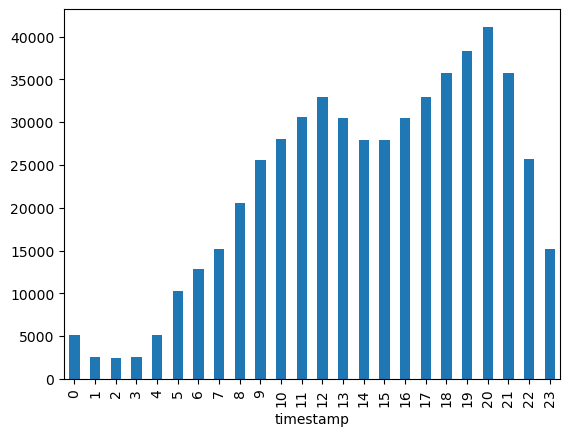

In [27]:
# The distribution of words sent in hours 
hours_sent = df.groupby(df['timestamp'].dt.hour)['record_id'].count()
hours_sent.plot(kind='bar')

We can see that majority of the terms are used at around 7 to 10pm in the night.

In [28]:
df.head()

,record_id,timestamp,slang_term,term_category,term_meaning,origin_platform,usage_platform,region,user_id,user_age_group,...,intensity_score,sentiment,sentiment_score,ironic_usage,likes,shares,comments,virality_score,is_viral,days_since_emergence
0,0,2020-01-01 01:23:17,simp,insult,someone overly devoted to another person,Reddit,Twitter,California,user_019223,25-30,...,0.603,negative,-0.740,False,18,2,5,0.004,False,153
1,1,2020-01-01 03:21:59,simp,insult,someone overly devoted to another person,Reddit,Twitter,Texas,user_497341,13-17,...,0.603,negative,-0.978,False,24,1,2,0.004,False,153
2,2,2020-01-01 05:31:01,vibe check,social,checking someone's mood/energy,TikTok,TikTok,Canada,user_323563,31-40,...,0.552,positive,0.384,False,121,1,0,0.013,False,92
3,3,2020-01-01 05:35:30,no cap,emphasis,"no lie, for real",Twitter,Twitter,Arizona,user_244857,18-24,...,0.551,neutral,0.167,False,47,2,1,0.006,False,214
4,4,2020-01-01 06:39:57,no cap,emphasis,"no lie, for real",Twitter,Instagram,Arizona,user_421848,13-17,...,0.551,positive,0.874,False,18,0,14,0.006,False,214


<Axes: xlabel='usage_platform'>

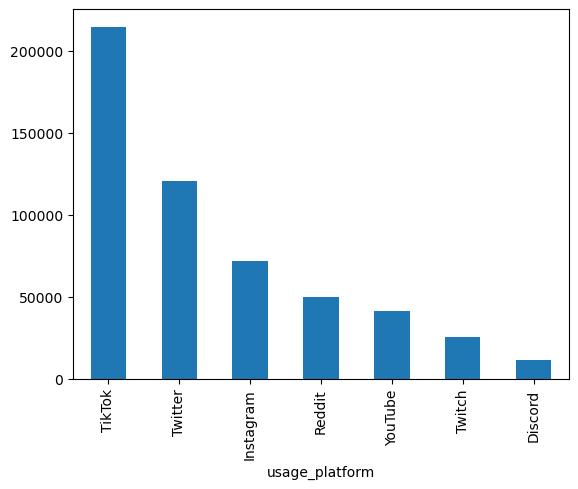

In [31]:
# What the most used platform 

df.groupby('usage_platform')['record_id'].count().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='origin_platform'>

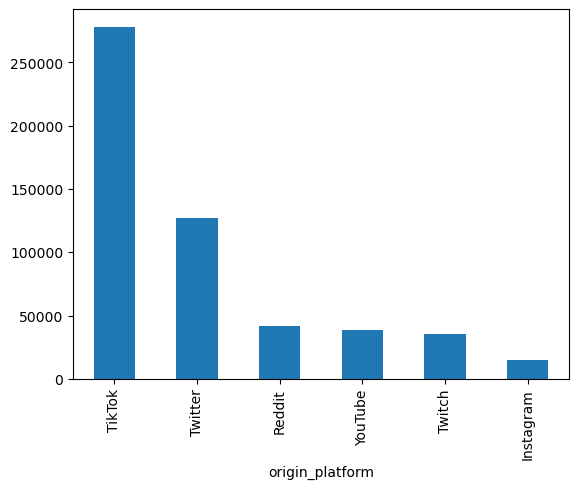

In [32]:
# where did most of the terms originate from 
df.groupby('origin_platform')['record_id'].count().sort_values(ascending=False).plot(kind='bar')

Tiktok leads with where the terms originated from and where it is mostly leads. But we can see that Instagram uses most of the terms but not all of them originated from there. 
Also none of the terms orignate from discord